<a href="https://colab.research.google.com/github/AlexyNat/ml/blob/main/lab3_3_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3

Данные из [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/Wine)

## Необходимые импорты

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

## Загрузка данных

In [2]:
data = pd.read_csv('sample_data/wine.data', header=None)
# классы (1, 2, 3)
y = data[0]
data.drop([0], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.values, y)

## Построение моделей

In [3]:
#Инициализация списков для сохранения accuracy моделей
acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []
#Цикл прогона моделей
for i in range(1, 11, 2):
  i = int(i)
  #Распечатка номера итерации
# print("Random: ", i)
  #Создание модели персептрона
  clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
  #Обучение модели
  clf.fit(X_train, y_train)
  #Получение прогноза
  predictions = clf.predict(X_test)
  # Расчет показателя accuracy
  acc = accuracy_score(y_test, predictions)
  #Распечатка результата
# print("Perceptron: ", acc)
  #Добавление оценки в список оценок для модели персептрона
  acc_p.append(acc)
  #Нормализация данных
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  #Работа пресептрона с нормализованными данными
  clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
  clf.fit(X_train_scaled, y_train)
  predictions = clf.predict(X_test_scaled)
  acc = accuracy_score(y_test, predictions)
# print("Perceptron with normalization: ", acc)
  acc_pn.append(acc)
  #Создание многослойного классификатора
  mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01,
  hidden_layer_sizes=(2, ), max_iter=2000, tol=0.00000001)
  mlp.fit(X_train, y_train)
  #Работа с ненормализованными данными
  predictions = mlp.predict(X_test)
  acc = accuracy_score(y_test, predictions)
# print("MLP: ", acc)
  acc_mlp.append(acc)
  #Работа с нормализованными данными
  mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01,
  hidden_layer_sizes=(2, ), max_iter=2000, tol=0.00000001)
  mlp.fit(X_train_scaled, y_train)
  predictions = mlp.predict(X_test_scaled)
  acc = accuracy_score(y_test, predictions)
# print("MLPwith Norm: ", acc)
  acc_mlpn.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

## Распечатка итоговых результатов

In [4]:
def median(lst):
  return np.median(np.array(lst))

print("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

Perceptron:  0.4 0.6444444444444445 0.6444444444444445 0.09532271373123208
Perceptron with Norm:  0.9777777777777777 1.0 1.0 0.008888888888888903
MLP:  0.3111111111111111 0.3111111111111111 0.3111111111111111 0.0
MLP with Norm:  0.9777777777777777 1.0 1.0 0.010886621079036363


## Построение графика

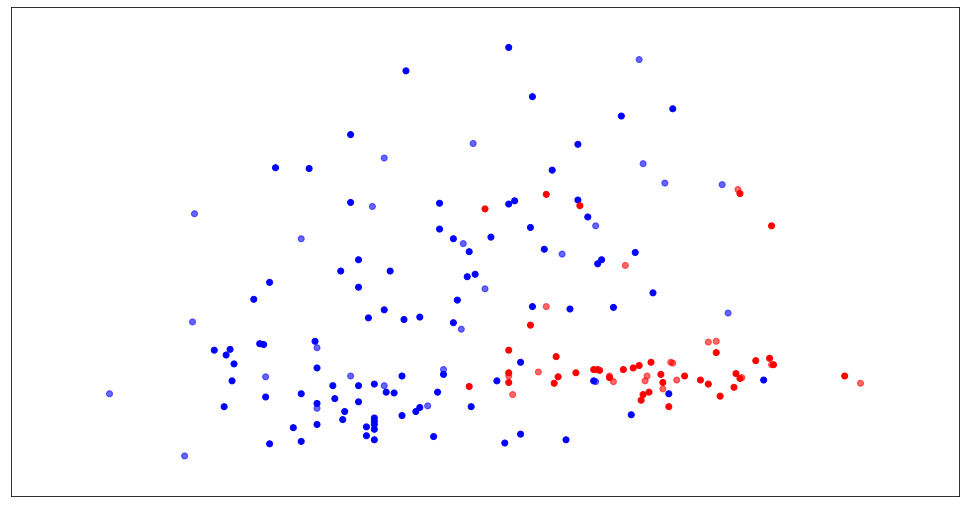

In [5]:
figure = plt.figure(figsize=(17, 9))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1, 1)

#Расчет минимума и максимума для графика
X = np.concatenate((X_train, X_test), axis=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


# Точки из обучающей выборки
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# Тестовые точки
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
plt.show()